In [2]:
import seaborn as sns
import pandas as pd
data = pd.read_csv(r'./Fitbit2.csv') 
data.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


<AxesSubplot:xlabel='NumberOfAwakings', ylabel='MinutesOfBeingAwake'>

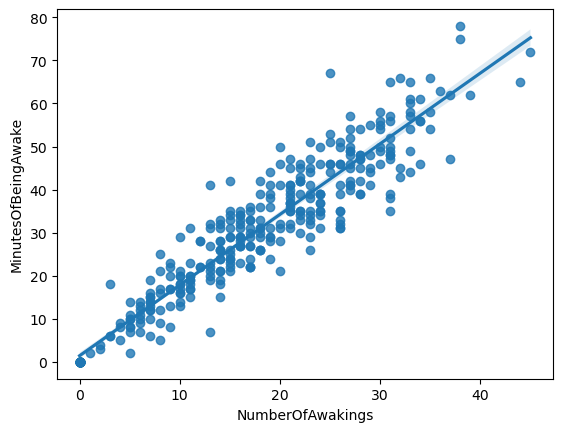

In [3]:
sns.regplot(x="NumberOfAwakings", y="MinutesOfBeingAwake", data=data)

In [4]:
from scipy import stats
X = data['NumberOfAwakings']
Y = data['MinutesOfBeingAwake']
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))

The slope is: 1.64051414361998
The intercept is: 1.4381033523783096


Multiple linear regression


In [5]:
X=data[["Minutes Sedentary","Minutes Lightly Active", "Minutes Fairly Active", "Minutes Very Active","Activity Calories"]]
X

,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
0,1.355,46,0,0,1680
1,611.000,316,61,60,2248
2,602.000,226,14,77,1719
3,749.000,190,23,4,9620
4,876.000,171,0,0,7360
...,...,...,...,...,...
362,599.000,275,49,79,236
363,684.000,333,10,55,2075
364,701.000,287,29,90,2249
365,575.000,298,8,85,2112


In [6]:
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
predictions = results.predict(X)

In [7]:
results.params

const                     12.151684
Minutes Sedentary          0.011452
Minutes Lightly Active     0.016812
Minutes Fairly Active      0.068821
Minutes Very Active        0.054627
Activity Calories          0.000818
dtype: float64

In [8]:
predictions

0      14.314663
1      33.775774
2      29.421001
3      33.593107
4      31.078159
         ...    
362    31.515472
363    30.973043
364    33.756238
365    30.667818
366    27.583879
Length: 367, dtype: float64

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
churnData = pd.read_csv(r'./Customer-Churn.csv')
numericData = churnData[['tenure','SeniorCitizen','MonthlyCharges']]
Y = pd.DataFrame(data=churnData, columns=['Churn'])
transformer = StandardScaler().fit(churnData[['tenure','SeniorCitizen','MonthlyCharges']])
scaled_x = transformer.transform(churnData[['tenure','SeniorCitizen','MonthlyCharges']])
classification = LogisticRegression(random_state=0, solver='lbfgs',multi_class='ovr').fit(scaled_x, churnData['Churn'])

In [19]:
predict=classification.predict(scaled_x)

In [20]:
residuals = [Y[i] - predict[i] for i in range(len(Y))]

KeyError: 0

In [13]:
import numpy as np
RMSE = np.sqrt(np.mean([residual**2 for residual in residuals]))


NameError: name 'residuals' is not defined

In [ ]:
RMSE

17.918082254445984

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(Y, predictions))
r2_score(Y, predictions)


321.0576716770921


0.06355502904761878

In [16]:
from scipy.stats import linregress

auto = pd.read_csv(r'./vehicles.csv')
auto.head()

FileNotFoundError: [Errno 2] No such file or directory: './vehicles.csv'

In [ ]:
slope, intercept, r_value, p_value, std_err = linregress(auto.acceleration, auto.mpg)
slope, intercept, r_value, p_value, std_err

(1.1912045293502274,
 4.9697930042539085,
 0.4202889121016507,
 1.8230915350787203e-18,
 0.12923643283101396)

In [ ]:
import statsmodels.api as sm

X = sm.add_constant(auto.acceleration) # We must add the intercept using the add_constant function
Y = auto.mpg

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     84.96
Date:                Sun, 16 Jan 2022   Prob (F-statistic):           1.82e-18
Time:                        22:20:33   Log-Likelihood:                -1343.9
No. Observations:                 398   AIC:                             2692.
Df Residuals:                     396   BIC:                             2700.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.9698      2.043      2.432   

In [ ]:
X = sm.add_constant(auto[['cylinders', 'weight', 'acceleration']]) # adding a constant
Y = auto.mpg

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     306.7
Date:                Sun, 16 Jan 2022   Prob (F-statistic):          1.14e-102
Time:                        22:21:10   Log-Likelihood:                -1142.9
No. Observations:                 398   AIC:                             2294.
Df Residuals:                     394   BIC:                             2310.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           42.3811      1.960     21.627   